In [9]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text


In [10]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text


In [11]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text)
    processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])
    return processed_text


In [12]:
def extract_entities_and_relationships(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    relationships = []
    for token in doc:
        if token.dep_ in ('nsubj', 'dobj'):
            subject = [w for w in token.head.lefts if w.dep_ == 'nsubj']
            if subject:
                relationships.append((subject[0], token.head.lemma_, token))
    return entities, relationships


In [13]:
import networkx as nx

def create_knowledge_graph(entities, relationships):
    G = nx.DiGraph()
    for entity in entities:
        G.add_node(entity[0], label=entity[1])
    for rel in relationships:
        G.add_edge(rel[0].text, rel[2].text, relationship=rel[1])
    return G


In [14]:
import matplotlib.pyplot as plt

def draw_knowledge_graph(G):
    plt.figure(figsize=(12, 12))  # Increase figure size
    pos = nx.spring_layout(G, k=0.5, iterations=20)  # Increase spacing with spring layout
    nx.draw(G, pos, with_labels=True, node_size=7000, node_color='skyblue', font_size=12, font_weight='bold', width=2, edge_color='grey')
    plt.title('Knowledge Graph Visualization')
    plt.show()

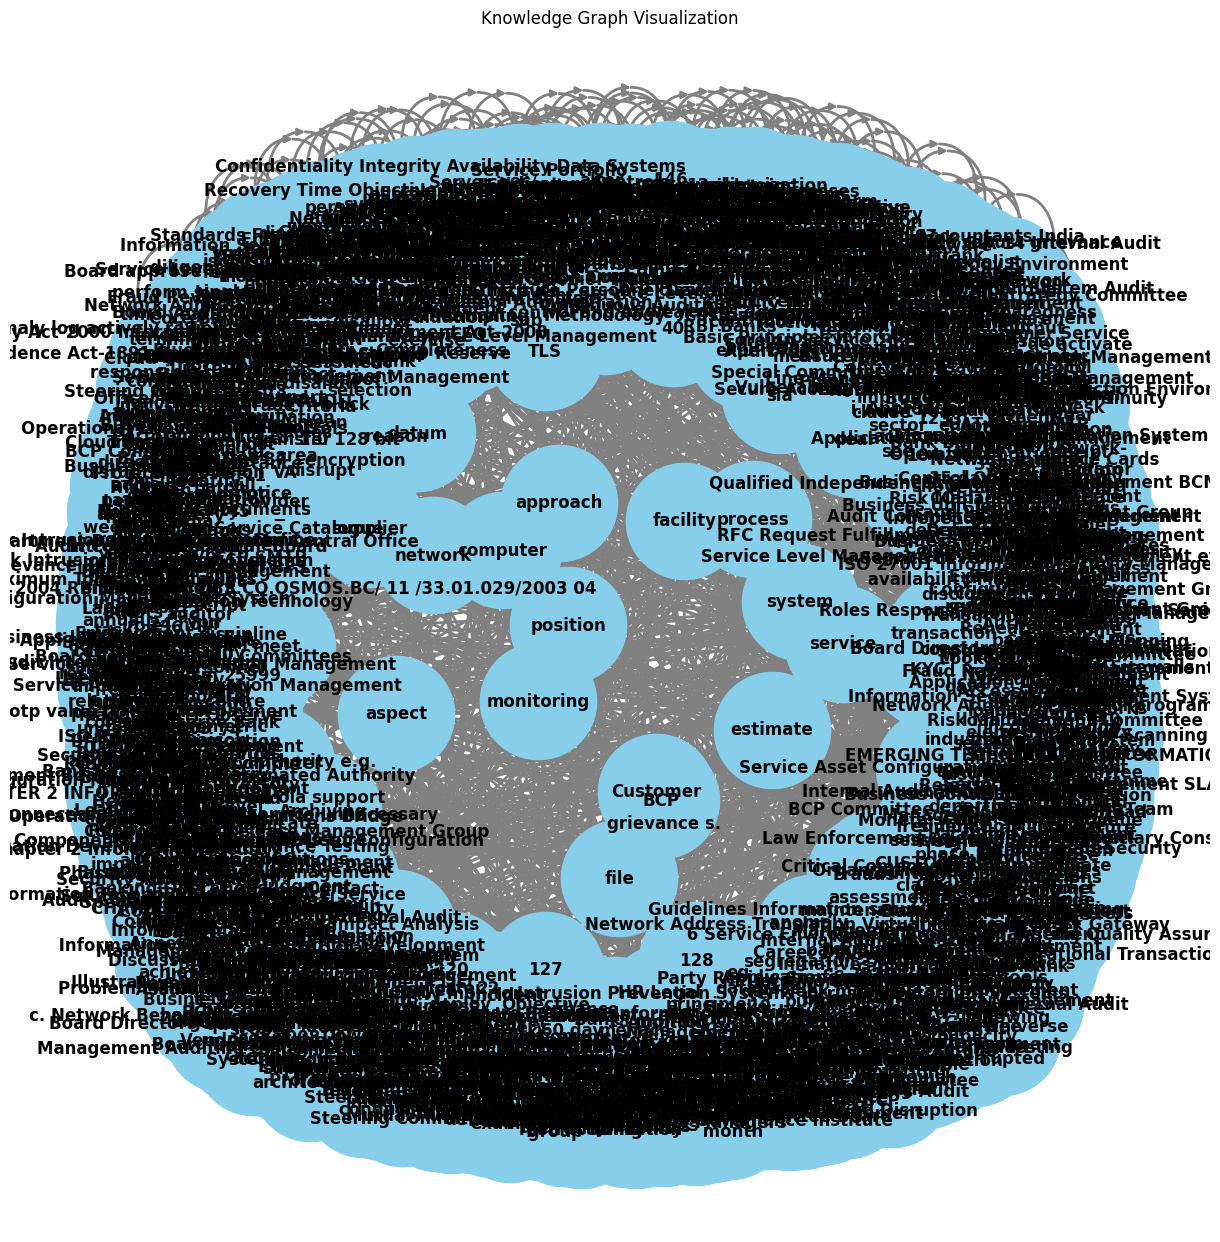

In [15]:
pdf_path = "RBI-Guidelines.pdf"
text = extract_text_from_pdf(pdf_path)
processed_text = preprocess_text(text)
entities, relationships = extract_entities_and_relationships(processed_text)
G = create_knowledge_graph(entities, relationships)
draw_knowledge_graph(G)